In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image

print('Версия pandas:', pd.__version__)

Версия pandas: 2.2.3


 # Временные метки и временные интервалы

    Временная метка (Timestamp) - это конкретное значение даты/времени,
    например: 2025-01-07 06:01:35.
    
    Временной интервал (Period) предполагает наличие неполной временной метки и маркера, который определяет период, 
    например: метка 2025-01 будет иметь маркер 'M', что означает - месяц.
    
    DatetimeIndex - это класс, позволяющий хранить массив временных меток, 
    которые могут быть использованы в качестве индексов при построение структур данных pandas.
    
    PeriodIndex - класс, хранящий массив временных интервалов, который также может быть использован в качестве индекса.
    
    

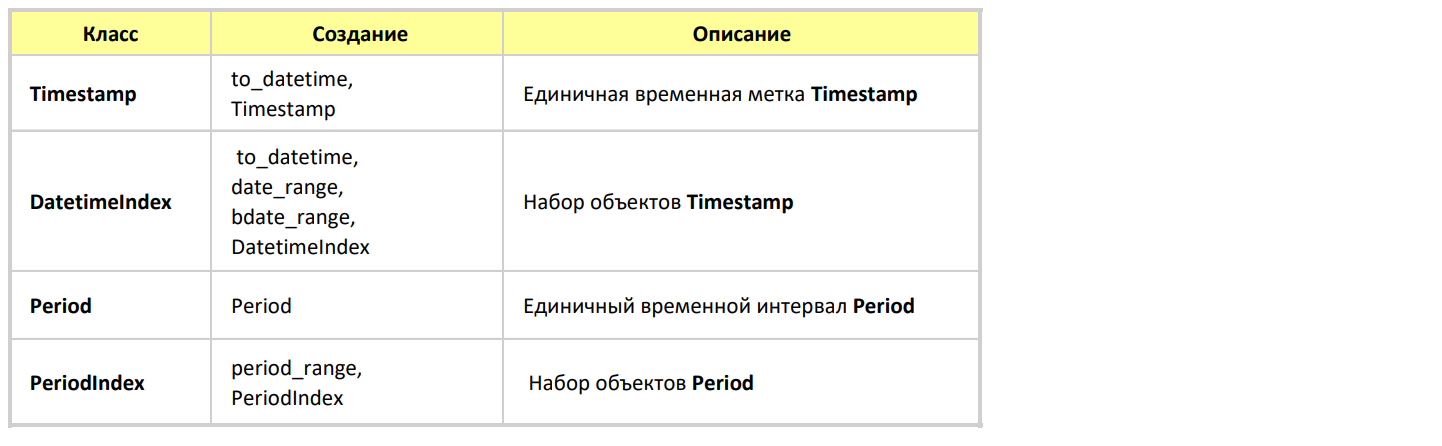

In [2]:
Image('files/timestamp_and_period.png')

In [3]:
# не путаем временные интервалы Period с временными промежутками Timedelta
display(pd.Timestamp('2024-10-5') - pd.Timestamp('2024-10-4'),
        pd.Period('2024-10-5'))

Timedelta('1 days 00:00:00')

Period('2024-10-05', 'D')

# Часть 1. Работа с временными метками

## Создание временной метки

## pd.Timestamp

    • ts_input: datetime, str, int, float 
    Значение, которое будет преобразовано в объект класса Timestamp.
    
    • year=None, год
    • month=None, месяц
    • day=None, день
    • hour=None, час
    • minute=None, минута
    • second=None, секунда
    • microsecond=None, микросекунда
    • nanosecond=None, наносекунда
    
    • tz: str, pytz.timezone, dateutil.tz.tzfile или None; значение по умолчанию: None
    Временная зона.
    • unit: str; значение по умолчанию: None
    Единица измерения, используемая для преобразования, если ts_input имеет тип int или float. 
    Допустимые значения: 'D', 'h', 'm', 's', 'ms', 'us' и 'ns'. Например, 's' означает секунды, а 'ms' - миллисекунды.
    
 

#### Пример 1.1

In [4]:
# Создание объекта из строки:
ts = pd.Timestamp('2024-10-5')
ts

Timestamp('2024-10-05 00:00:00')

In [5]:
ts = pd.Timestamp('2024-10-5 01:15:33')
ts

Timestamp('2024-10-05 01:15:33')

#### Пример 1.2

In [6]:
# Использование объекта datetime:
from datetime import datetime
dt = datetime.now()
dt

datetime.datetime(2025, 5, 14, 15, 49, 34, 521756)

In [7]:
ts = pd.Timestamp(dt)
ts

Timestamp('2025-05-14 15:49:34.521756')

#### Пример 1.3

In [8]:
# Использование int и float значений:
ts = pd.Timestamp(1704067200, unit='s')
ts

Timestamp('2024-01-01 00:00:00')

In [9]:
ts = pd.Timestamp(1704067200.73567, unit='s')
ts

Timestamp('2024-01-01 00:00:00.735670090')

## Функция pd.to_datetime()

#### Пример 1.4

In [10]:
# для создания объектов Timestamp можно использовать метод to_datetime()
ts = pd.to_datetime('2024-01-01 00:01:02')
ts

Timestamp('2024-01-01 00:01:02')

In [11]:
ts = pd.to_datetime('20240101023215', format='%Y%m%d%H%M%S')
ts

Timestamp('2024-01-01 02:32:15')

In [12]:
# количество секунд, прошедших с начала эпохи (1 января 1970 года в 00:00:00 UTC)
ts = pd.to_datetime(1704067200, unit='s')
ts

Timestamp('2024-01-01 00:00:00')

#### при использовании Timestamp можно оперировать с временными данным в следующем диапазоне: 

In [13]:
pd.Timestamp.min

Timestamp('1677-09-21 00:12:43.145224193')

In [14]:
pd.Timestamp.max

Timestamp('2262-04-11 23:47:16.854775807')

# Создание ряда временных меток

#### Пример 2.1

In [15]:
dti = pd.to_datetime(['2024-01-01', '2024-01-02', '2024-01-03'])
dti

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03'], dtype='datetime64[ns]', freq=None)

#### Пример 2.2

In [16]:
# Можно использовать список объектов Timestamp:
dti = pd.to_datetime([pd.Timestamp('2024-01-01'), pd.Timestamp('2024-01-02')])
dti

DatetimeIndex(['2024-01-01', '2024-01-02'], dtype='datetime64[ns]', freq=None)

#### Пример 2.3

In [17]:
dti = pd.to_datetime([1704066359, 1704067200, 1704067460], unit='s')
dti

DatetimeIndex(['2023-12-31 23:45:59', '2024-01-01 00:00:00',
               '2024-01-01 00:04:20'],
              dtype='datetime64[ns]', freq=None)

## Функция pd.date_range()

#### • start: str; значение по умолчанию: None
    Левая граница генерируемых данных
#### • end: str; значение по умолчанию: None
    Правая граница генерируемых данных
#### • period: integer; значение по умолчанию: None
    Количество элементов в создаваемом массиве
#### • freq: str(или DateOffset); значение по умолчанию: 'D'
    Шаг, с которым будут генерироваться данные
#### • tz: str; значение по умолчанию: None
    Временная зона, например: 'Europe/Brussels'
#### • normalize: bool, по умолчанию: False
    Нормализация начальной/конечной даты до полуночи перед созданием диапазона дат
#### • name: str, по умолчанию: None
    Имя результирующего объекта DatetimeIndex
#### • inclusive: {'both', 'neither', 'left', 'right'}, по умолчанию: 'both'
    Включение границ; установить ли каждую границу как закрытую или открытую

### Параметр freq

    D День
    W Неделя
    M Месяц
    SM Половина месяца (15 дней)
    Q Квартал
    A, Y Год
    H, h Час
    T, min Минута
    S, s Секунда
    L, ms Миллисекунда
    U, us Микросекунда
    N, ns Наносекунда

#### Пример 3.1

In [18]:
# создаем массив временных меток с шагом в один час, который охватывает интервал в пять дней (то есть 120 часов)
dt_h = pd.date_range(start='2024-02-01', freq='h', periods=120)
dt_h

DatetimeIndex(['2024-02-01 00:00:00', '2024-02-01 01:00:00',
               '2024-02-01 02:00:00', '2024-02-01 03:00:00',
               '2024-02-01 04:00:00', '2024-02-01 05:00:00',
               '2024-02-01 06:00:00', '2024-02-01 07:00:00',
               '2024-02-01 08:00:00', '2024-02-01 09:00:00',
               ...
               '2024-02-05 14:00:00', '2024-02-05 15:00:00',
               '2024-02-05 16:00:00', '2024-02-05 17:00:00',
               '2024-02-05 18:00:00', '2024-02-05 19:00:00',
               '2024-02-05 20:00:00', '2024-02-05 21:00:00',
               '2024-02-05 22:00:00', '2024-02-05 23:00:00'],
              dtype='datetime64[ns]', length=120, freq='h')

#### Пример 3.2

In [19]:
# можно создать DatetimeIndex, содержащий временные метки с шагом в одну минуту и общим интервалом в один час
dt_m = pd.date_range(start='2024-02-01', freq='min', periods=60)
dt_m

DatetimeIndex(['2024-02-01 00:00:00', '2024-02-01 00:01:00',
               '2024-02-01 00:02:00', '2024-02-01 00:03:00',
               '2024-02-01 00:04:00', '2024-02-01 00:05:00',
               '2024-02-01 00:06:00', '2024-02-01 00:07:00',
               '2024-02-01 00:08:00', '2024-02-01 00:09:00',
               '2024-02-01 00:10:00', '2024-02-01 00:11:00',
               '2024-02-01 00:12:00', '2024-02-01 00:13:00',
               '2024-02-01 00:14:00', '2024-02-01 00:15:00',
               '2024-02-01 00:16:00', '2024-02-01 00:17:00',
               '2024-02-01 00:18:00', '2024-02-01 00:19:00',
               '2024-02-01 00:20:00', '2024-02-01 00:21:00',
               '2024-02-01 00:22:00', '2024-02-01 00:23:00',
               '2024-02-01 00:24:00', '2024-02-01 00:25:00',
               '2024-02-01 00:26:00', '2024-02-01 00:27:00',
               '2024-02-01 00:28:00', '2024-02-01 00:29:00',
               '2024-02-01 00:30:00', '2024-02-01 00:31:00',
               '2024-02-

In [20]:
print(len(dt_h), len(dt_m), sep='\n')

120
60


#### Пример 3.3

In [21]:
import random
rnd = [random.randint(0, 100) for i in range(len(dt_h))]
s_dt = pd.Series(rnd, index=dt_h)
s_dt

2024-02-01 00:00:00     75
2024-02-01 01:00:00      7
2024-02-01 02:00:00     31
2024-02-01 03:00:00     72
2024-02-01 04:00:00     56
                      ... 
2024-02-05 19:00:00     99
2024-02-05 20:00:00     51
2024-02-05 21:00:00     39
2024-02-05 22:00:00    100
2024-02-05 23:00:00     48
Freq: h, Length: 120, dtype: int64

# Часть 2. Работа с временными интервалами

## Создание временного интервала

## pd.Period

#### • value: str, datetime, date or pandas.Timestamp, значение по умолчанию: None
    Период времени (например, '4Q2010' - 4 квартал 2010 года). Это не начало и не конец периода, а скорее весь период.
#### • freq: str; значение по умолчанию: None
    Строка с меткой, определяющей временной интервал.
    Подробнее посмотреть все возможные варианты можно в разделе period alias в пользовательской документации
    
    D День
    W Неделя
    M Месяц
    SM Половина месяца (15 дней)
    Q Квартал
    A, Y Год
    H, h Час
    T, min Минута
    S, s Секунда
    L, ms Миллисекунда
    U, us Микросекунда
    N, ns Наносекунда

In [22]:
# Примеры конструирования объекта Period:

display(pd.Period('2024'), # год
        pd.Period('2024-01'),# месяц
        pd.Period('2024-01-01'), # день
        pd.Period('2024', freq='M')) # месяц

Period('2024', 'Y-DEC')

Period('2024-01', 'M')

Period('2024-01-01', 'D')

Period('2024-01', 'M')

#### Пример 4.1

In [23]:
# создадим объект Period- временной интервал в день
prd = pd.Period('2024', freq='D')
prd

Period('2024-01-01', 'D')

In [24]:
# прибавим к prd 7, что будет означать прибавление семи дней к текущей дате:
prd + 7

Period('2024-01-08', 'D')

In [25]:
prd + 53

Period('2024-02-23', 'D')

#### если мы создадим объект, в котором интервалом будет месяц, то арифметические операции будут производится над месяцами относительно указанной даты

#### Пример 4.2

In [26]:
prd_m = pd.Period('2024', freq='M')
prd_m

Period('2024-01', 'M')

In [27]:
prd_m + 5

Period('2024-06', 'M')

## Создание ряда временных интервалов

## pd.PeriodIndex

In [28]:
pd.PeriodIndex(['2018', '2017', '2016'], freq='M')

PeriodIndex(['2018-01', '2017-01', '2016-01'], dtype='period[M]')

In [29]:
pd.PeriodIndex(['2018', '2017', '2016'], freq='D')

PeriodIndex(['2018-01-01', '2017-01-01', '2016-01-01'], dtype='period[D]')

## Функция pd.period_range()

### Более удобным инструментом для создания рядов временных интервалов является метод period_range(), который, по принципу работы напоминает date_range().

#### • start: str; значение по умолчанию: None
    Левая граница генерируемых данных
#### • end: str; значение по умолчанию: None
    Правая граница генерируемых данных
#### • period: integer; значение по умолчанию: None
    Количество элементов в массиве
#### • freq: str (или DateOffset); значение по умолчанию: 'D'
    Шаг, с которым будут генерироваться данные
#### • name: str; значение по умолчанию: None
    Имя объекта PeriodIndex

#### Пример 5.1

In [30]:
# генерируем ряд временных интервалов в диапазоне между 2024 и 2025-м годом с шагом в один месяц:
pd.period_range('2024', '2025', freq='M')

PeriodIndex(['2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06',
             '2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12',
             '2025-01'],
            dtype='period[M]')

#### Пример 5.2

In [31]:
# генерируем ряд временных интервалов в диапазоне между 2024 и 2025-м годом с шагом в один день:
pd.period_range('2024', '2025', freq='D')

PeriodIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
             '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
             '2024-01-09', '2024-01-10',
             ...
             '2024-12-23', '2024-12-24', '2024-12-25', '2024-12-26',
             '2024-12-27', '2024-12-28', '2024-12-29', '2024-12-30',
             '2024-12-31', '2025-01-01'],
            dtype='period[D]', length=367)

#### Пример 5.3

In [32]:
# генерируем начиная с 1 января 2024 года десять временных интервалов шагом в неделю:
pd.period_range('2024-01-01', periods=10, freq='W')

PeriodIndex(['2024-01-01/2024-01-07', '2024-01-08/2024-01-14',
             '2024-01-15/2024-01-21', '2024-01-22/2024-01-28',
             '2024-01-29/2024-02-04', '2024-02-05/2024-02-11',
             '2024-02-12/2024-02-18', '2024-02-19/2024-02-25',
             '2024-02-26/2024-03-03', '2024-03-04/2024-03-10'],
            dtype='period[W-SUN]')

## Использование временных рядов в качестве индексов

In [33]:
# Создаем DatetimeIndex - ряд временных меток с отсечкой в один день:
dt_d = pd.date_range(start='2024-01-01', freq='D', periods=60)
dt_d

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
               '2024-01-09', '2024-01-10', '2024-01-11', '2024-01-12',
               '2024-01-13', '2024-01-14', '2024-01-15', '2024-01-16',
               '2024-01-17', '2024-01-18', '2024-01-19', '2024-01-20',
               '2024-01-21', '2024-01-22', '2024-01-23', '2024-01-24',
               '2024-01-25', '2024-01-26', '2024-01-27', '2024-01-28',
               '2024-01-29', '2024-01-30', '2024-01-31', '2024-02-01',
               '2024-02-02', '2024-02-03', '2024-02-04', '2024-02-05',
               '2024-02-06', '2024-02-07', '2024-02-08', '2024-02-09',
               '2024-02-10', '2024-02-11', '2024-02-12', '2024-02-13',
               '2024-02-14', '2024-02-15', '2024-02-16', '2024-02-17',
               '2024-02-18', '2024-02-19', '2024-02-20', '2024-02-21',
               '2024-02-22', '2024-02-23', '2024-02-24', '2024-02-25',
      

In [34]:
# на базе полученного объекта создаем структуру Series:

dr = [random.randint(10, 100) for i in range(len(dt_d))]
s = pd.Series(dr, index=dt_d)
s

2024-01-01     10
2024-01-02     36
2024-01-03     11
2024-01-04    100
2024-01-05     67
2024-01-06     82
2024-01-07     13
2024-01-08     18
2024-01-09     34
2024-01-10     45
2024-01-11     63
2024-01-12     47
2024-01-13     22
2024-01-14     80
2024-01-15     59
2024-01-16     20
2024-01-17     98
2024-01-18     81
2024-01-19     74
2024-01-20     93
2024-01-21     60
2024-01-22     70
2024-01-23     69
2024-01-24     89
2024-01-25     94
2024-01-26     76
2024-01-27     84
2024-01-28     33
2024-01-29     76
2024-01-30     16
2024-01-31     53
2024-02-01     62
2024-02-02     17
2024-02-03     84
2024-02-04     52
2024-02-05     38
2024-02-06     54
2024-02-07     78
2024-02-08     35
2024-02-09     31
2024-02-10     97
2024-02-11     33
2024-02-12     72
2024-02-13     41
2024-02-14     80
2024-02-15     82
2024-02-16     40
2024-02-17     63
2024-02-18     24
2024-02-19     86
2024-02-20     52
2024-02-21     76
2024-02-22     95
2024-02-23     20
2024-02-24     91
2024-02-25

#### Пример 6.1

In [35]:
# Для получения доступа к элементам данной структуры Series можно использовать числовые индексы 
# либо метку времени в текстовом виде:
print(s[:5])
print()
print(s['2024-01-15'])

2024-01-01     10
2024-01-02     36
2024-01-03     11
2024-01-04    100
2024-01-05     67
Freq: D, dtype: int64

59


#### Пример 6.2

In [36]:
# Для получения данных из заданного временного диапазона допускается использование срезов:
s['2024-01-05':'2024-01-15']

2024-01-05    67
2024-01-06    82
2024-01-07    13
2024-01-08    18
2024-01-09    34
2024-01-10    45
2024-01-11    63
2024-01-12    47
2024-01-13    22
2024-01-14    80
2024-01-15    59
Freq: D, dtype: int64

#### Пример 6.3

In [37]:
s['2024-01']

2024-01-01     10
2024-01-02     36
2024-01-03     11
2024-01-04    100
2024-01-05     67
2024-01-06     82
2024-01-07     13
2024-01-08     18
2024-01-09     34
2024-01-10     45
2024-01-11     63
2024-01-12     47
2024-01-13     22
2024-01-14     80
2024-01-15     59
2024-01-16     20
2024-01-17     98
2024-01-18     81
2024-01-19     74
2024-01-20     93
2024-01-21     60
2024-01-22     70
2024-01-23     69
2024-01-24     89
2024-01-25     94
2024-01-26     76
2024-01-27     84
2024-01-28     33
2024-01-29     76
2024-01-30     16
2024-01-31     53
Freq: D, dtype: int64

#### Пример 6.4

In [38]:
from datetime import datetime
s[datetime(2024,2,1):datetime(2024,2,8)]

2024-02-01    62
2024-02-02    17
2024-02-03    84
2024-02-04    52
2024-02-05    38
2024-02-06    54
2024-02-07    78
2024-02-08    35
Freq: D, dtype: int64

#### freq='2h20min' ( т.е. freq='140min')

#### Пример № 7.1

In [39]:
# возможность комбинации псевдонимов в параметре freq
pd.date_range(start='2024-01-01', periods=10, freq='2h20min')

DatetimeIndex(['2024-01-01 00:00:00', '2024-01-01 02:20:00',
               '2024-01-01 04:40:00', '2024-01-01 07:00:00',
               '2024-01-01 09:20:00', '2024-01-01 11:40:00',
               '2024-01-01 14:00:00', '2024-01-01 16:20:00',
               '2024-01-01 18:40:00', '2024-01-01 21:00:00'],
              dtype='datetime64[ns]', freq='140min')

## Функция pd.infer_freq() 
_позволяет получить наиболее вероятную частоту временного ряда с учетом входного Index._

    Аргумент index может быть pandas.DatetimeIndex, pandas.TimedeltaIndex, Series или массив. 
    Если передан объект Series, то будут использоваться значения серии (НЕ ИНДЕКС).

#### Пример № 8.1

In [40]:
idx = pd.date_range(start='2020/12/01', end='2020/12/30', periods=30)
idx

DatetimeIndex(['2020-12-01', '2020-12-02', '2020-12-03', '2020-12-04',
               '2020-12-05', '2020-12-06', '2020-12-07', '2020-12-08',
               '2020-12-09', '2020-12-10', '2020-12-11', '2020-12-12',
               '2020-12-13', '2020-12-14', '2020-12-15', '2020-12-16',
               '2020-12-17', '2020-12-18', '2020-12-19', '2020-12-20',
               '2020-12-21', '2020-12-22', '2020-12-23', '2020-12-24',
               '2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', freq=None)

In [41]:
# пример получения наиболее вероятной частоты:
pd.infer_freq(idx)

'D'